# TASK

To build a classification methodology to predict the type of forest cover based on the given training data.

In [1]:
#import the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#save the model
import pickle
%matplotlib inline
#To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("credit-card-default.csv")

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train,test=train_test_split(data,test_size=0.3,random_state=42)

In [5]:
train2,val=train_test_split(train,test_size=0.3,random_state=42)

In [6]:
train2.shape

(14700, 25)

In [7]:
test.shape

(9000, 25)

In [8]:
val.shape

(6300, 25)

In [9]:
type(test)

pandas.core.frame.DataFrame

In [10]:
Testdata=test.to_dict(orient="records")

In [11]:
Traindata=train2.to_dict(orient="records")

In [12]:
Valdata=val.to_dict(orient="records")

In [13]:
!pip install pymongo

You should consider upgrading via the 'C:\Users\MorampudiManasa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [14]:
import pymongo

In [15]:
connection=pymongo.MongoClient("mongodb://localhost:27017")

In [16]:
mydb=connection["project1"]

In [17]:
print(mydb)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'project1')


In [18]:
traincollection=mydb["train2"]
testcollection=mydb["test"]
valcollection=mydb["val"]

In [19]:
traincollection.insert_many(Traindata)
testcollection.insert_many(Testdata)
valcollection.insert_many(Valdata)
print("all data inserted into a mongodb database")

all data inserted into a mongodb database


In [20]:
def exportdata(dbname,colname):
#create connection to mongodb local host at ipadd:27017
    myclient = pymongo.MongoClient('mongodb://localhost:27017/')
    print(myclient.list_database_names())
    
    #connect to database in mongo db
    mydb = myclient[dbname]
    print(mydb.list_collection_names())
    
    allrecords = mydb[colname].find()
    list_courser = list(allrecords)
    
    #creating dataframe from fetched data from database and droping "_id " columns from database.
    df = pd.DataFrame(list_courser)

    #converting this dataframe to .csv file for better training.
    df.to_csv(f"{colname}.csv")
    
    print(f"{colname} file data is downloaded from batabase and converted CSV>.....>>>>>>>>>>")


exportdata('project1','val')

['admin', 'config', 'local', 'project1']
['train2', 'val', 'test']
val file data is downloaded from batabase and converted CSV>.....>>>>>>>>>>


# Reading data form csv file

In [25]:
df1=pd.read_csv("train2.csv")

In [26]:
df1

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,0,15234,100000,2,2,1,38,0,0,0,...,84528,67873,65503,3421,7728,0,5000,2600,0,0
1,1,22597,330000,2,3,1,40,0,0,0,...,80923,82580,84330,3100,3026,3000,3000,3078,3238,0
2,2,16692,50000,1,2,2,33,0,0,0,...,30227,18413,17195,5494,3202,3502,3200,2500,3000,0
3,3,25109,230000,1,2,1,60,0,0,0,...,123958,124474,120570,6057,4845,4291,4115,4274,4054,0
4,4,4115,20000,1,2,1,38,-1,0,0,...,14999,15121,19283,1342,1231,524,741,5000,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,14695,12945,180000,2,3,1,33,-1,0,0,...,159342,10400,20650,5950,7133,7369,600,20650,21650,0
14696,14696,17195,450000,2,2,2,29,0,0,0,...,31126,18345,12836,10000,1500,2109,5000,1000,3020,0
14697,14697,28189,70000,2,2,2,34,0,0,0,...,55193,27099,28298,3200,2518,1525,1000,2000,2000,0
14698,14698,3573,20000,2,2,1,24,1,2,0,...,20298,20337,19863,0,1720,1754,893,0,400,0


In [28]:
df1.drop(['Unnamed: 0','ID'],axis=1,inplace=True)

In [29]:
df1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,100000,2,2,1,38,0,0,0,2,2,...,84528,67873,65503,3421,7728,0,5000,2600,0,0
1,330000,2,3,1,40,0,0,0,0,0,...,80923,82580,84330,3100,3026,3000,3000,3078,3238,0
2,50000,1,2,2,33,0,0,0,0,0,...,30227,18413,17195,5494,3202,3502,3200,2500,3000,0
3,230000,1,2,1,60,0,0,0,0,0,...,123958,124474,120570,6057,4845,4291,4115,4274,4054,0
4,20000,1,2,1,38,-1,0,0,0,0,...,14999,15121,19283,1342,1231,524,741,5000,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14695,180000,2,3,1,33,-1,0,0,0,0,...,159342,10400,20650,5950,7133,7369,600,20650,21650,0
14696,450000,2,2,2,29,0,0,0,0,0,...,31126,18345,12836,10000,1500,2109,5000,1000,3020,0
14697,70000,2,2,2,34,0,0,0,0,0,...,55193,27099,28298,3200,2518,1525,1000,2000,2000,0
14698,20000,2,2,1,24,1,2,0,0,2,...,20298,20337,19863,0,1720,1754,893,0,400,0


# Data preprocessing

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14700 entries, 0 to 14699
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  14700 non-null  int64
 1   SEX        14700 non-null  int64
 2   EDUCATION  14700 non-null  int64
 3   MARRIAGE   14700 non-null  int64
 4   AGE        14700 non-null  int64
 5   PAY_0      14700 non-null  int64
 6   PAY_2      14700 non-null  int64
 7   PAY_3      14700 non-null  int64
 8   PAY_4      14700 non-null  int64
 9   PAY_5      14700 non-null  int64
 10  PAY_6      14700 non-null  int64
 11  BILL_AMT1  14700 non-null  int64
 12  BILL_AMT2  14700 non-null  int64
 13  BILL_AMT3  14700 non-null  int64
 14  BILL_AMT4  14700 non-null  int64
 15  BILL_AMT5  14700 non-null  int64
 16  BILL_AMT6  14700 non-null  int64
 17  PAY_AMT1   14700 non-null  int64
 18  PAY_AMT2   14700 non-null  int64
 19  PAY_AMT3   14700 non-null  int64
 20  PAY_AMT4   14700 non-null  int64
 21  PAY_AMT5   1

# DATASET DESCRIPTION

Text(0.5, 1.0, 'EDUCATIONv/s COUNT')

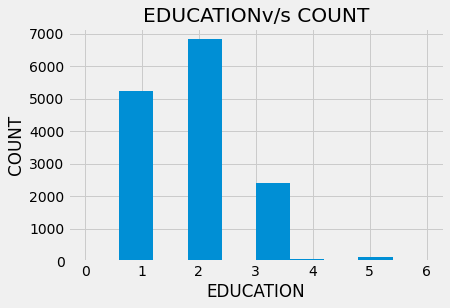

In [32]:
plt.style.use('fivethirtyeight')
df1["EDUCATION"].hist()
plt.xlabel("EDUCATION")
plt.ylabel("COUNT")
plt.title('EDUCATIONv/s COUNT')



More number of credit holders are university students followed by Graduates and then High school students

Text(0.5, 1.0, ' defaulted v/s COUNT')

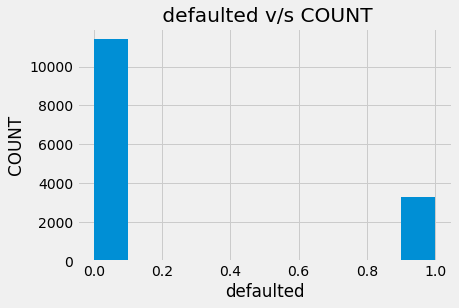

In [33]:
plt.style.use('fivethirtyeight')
df1["defaulted"].hist()
plt.xlabel("defaulted")
plt.ylabel("COUNT")
plt.title(' defaulted v/s COUNT')



Percentage of Defaulters are smaller than the Non Defaulters in the dataset

# Checking the number of counts of defaulters and non defaulters sexwise

<AxesSubplot:xlabel='SEX', ylabel='count'>

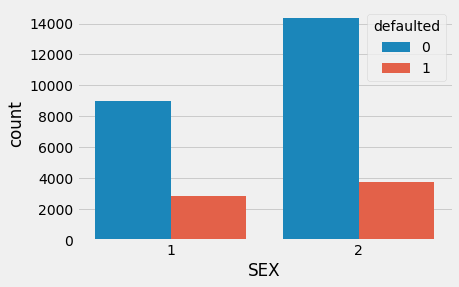

In [34]:
sns.countplot(x='SEX', data=data,hue="defaulted")

 It is evident from the above output that females have overall less default payments wrt males

Non-Defaults have a higher proportion of Females 

# plot columns with similar names to check the correlation

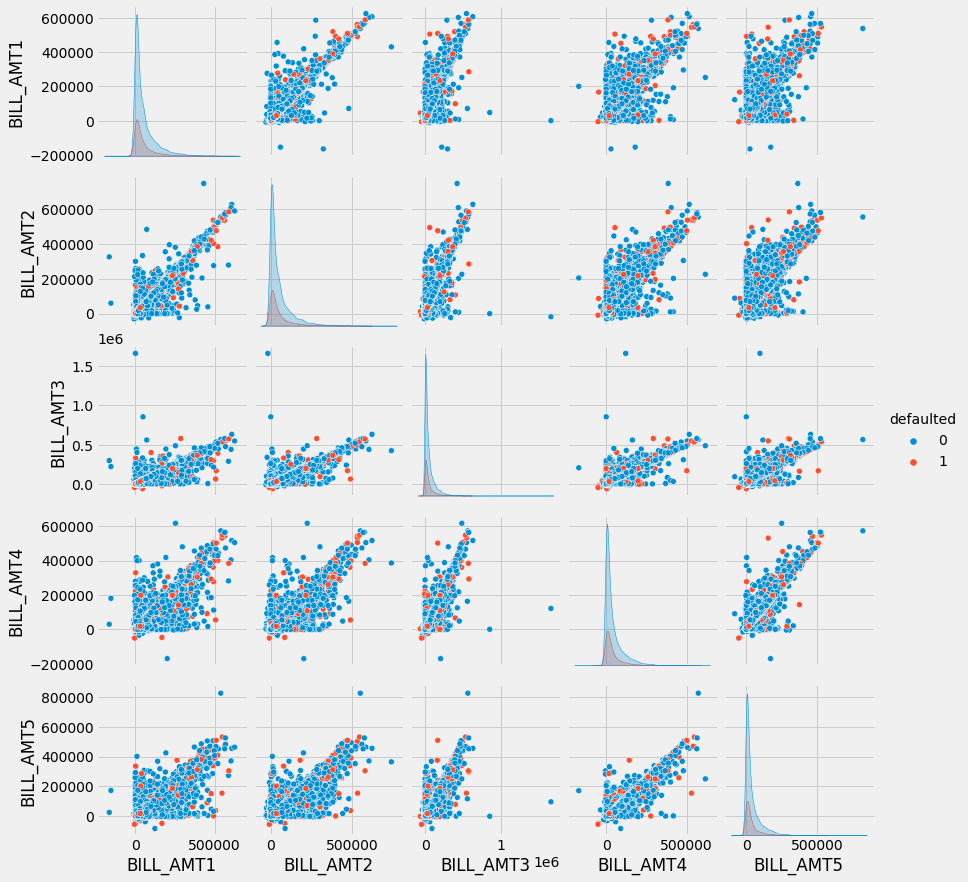

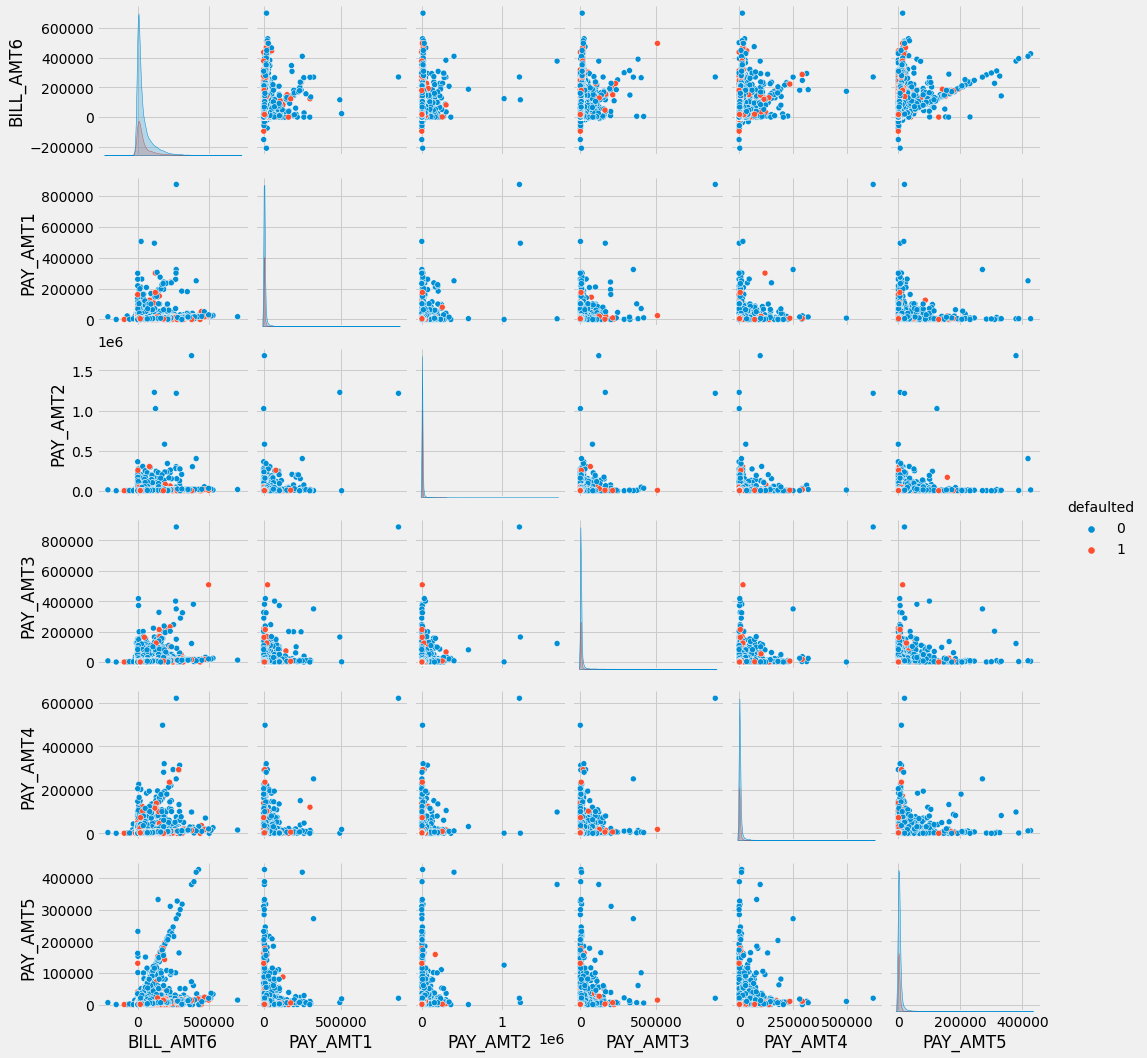

In [36]:
sns.pairplot(df1, vars=data.columns[12:17], kind='scatter',hue= 'defaulted')
sns.pairplot(df1, vars=data.columns[17:23],hue = 'defaulted')

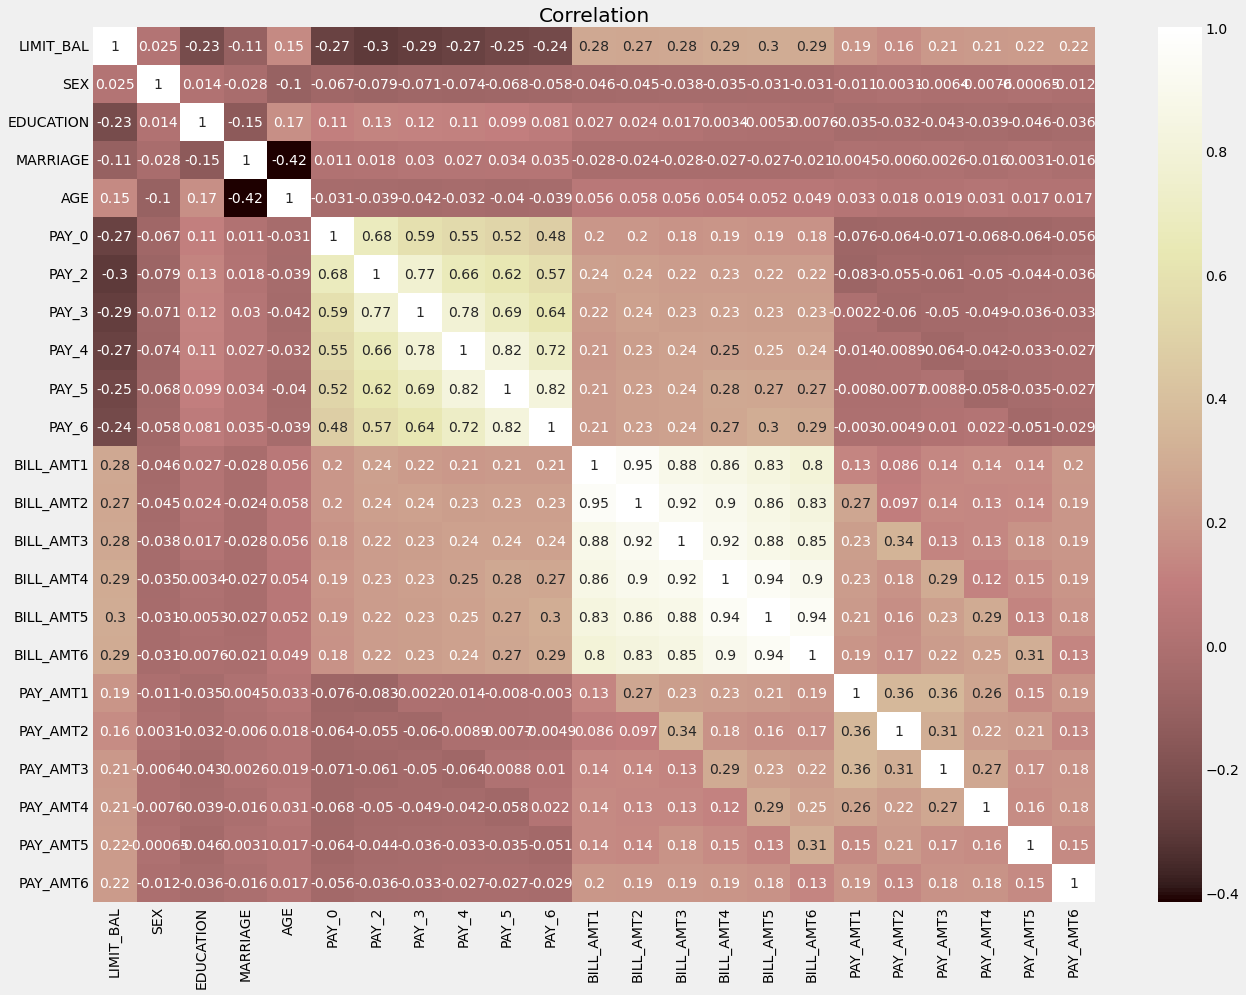

In [38]:
x=df1.drop('defaulted',axis=1)
plt.figure(figsize=(20,15))
sns.heatmap(x[x.describe().columns.tolist()].corr(), cmap="pink", annot=True, xticklabels='auto')
plt.title('Correlation')
plt.show()


In [39]:
def feature_selection(data, pos_corr=0.6, neg_corr=-0.5):
    data = data[data.describe().columns.tolist()]
    # Create correlation matrix
    corr_matrix = data.corr()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of feature columns with correlation greater than 0.95
    selected_cols = [column for column in upper.columns if any(upper[column] > pos_corr) or any(upper[column] < neg_corr)]
    return selected_cols

# feature_selection(df1, pos_corr=0.5, neg_corr=-0.1)
selected_feats = feature_selection(df1)
selected_feats

['PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6']